In [ ]:
import numpy as np
import pandas as pd

In [112]:
days = 1000
n = 100
market_mat = np.random.standard_t(2, days) / 100

In [113]:
betas = np.random.uniform(0.5, 1.5, n)
alphas = np.random.uniform(0.001, -0.001, n)
noise = None

In [114]:
rets_raw = pd.DataFrame(betas).dot(pd.DataFrame(market_mat).T).T
stocks_ris = (rets_raw.add(pd.Series(alphas) + 1)).cumprod()

<AxesSubplot:>

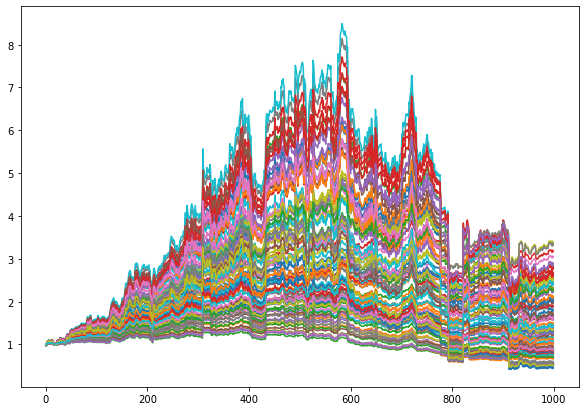

In [115]:
stocks_ris.plot(legend=False, figsize=(10, 7))

In [116]:

# OLS regression
# add constant 1 to X to have (Tx2) matrix
X = np.stack((np.ones(market_mat.shape), market_mat)).T
G_hat = np.linalg.inv(X.T @ X) @ ( X.T @ stocks_ris.pct_change().fillna(0).to_numpy())
beta_hat = G_hat[1,:].reshape(G_hat.shape[1],1)

# display the estimated CAPM coefficients
G_hat = pd.DataFrame(G_hat, index=('alphas', 'betas'))
G_hat

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
alphas,0.000582,-0.000425,0.000801,0.000448,0.000364,0.000678,-0.000450,0.000405,0.000751,-0.000663,...,-0.000840,-0.000176,-0.000559,-0.000359,-0.000823,-0.000157,-0.000349,-0.000843,-0.000674,0.000124
betas,1.251521,1.015515,1.370733,1.283299,1.477869,0.539826,0.792103,0.632437,1.005970,1.399815,...,1.264986,0.981319,0.773484,0.924101,0.544009,1.215407,0.811306,0.750003,1.413828,0.670594


In [117]:
betas

array([1.25191667, 1.01585346, 1.37116296, 1.28370731, 1.47834244,
       0.53998807, 0.79236961, 0.63263437, 1.00628172, 1.4002825 ,
       1.35475405, 0.54127275, 1.25644782, 0.63542177, 0.70899779,
       1.45153051, 1.22289156, 1.33048173, 0.92044218, 1.49456713,
       1.42654065, 0.81297021, 0.51105621, 0.66059822, 1.11833678,
       0.68000053, 0.62021484, 1.43439917, 0.80975079, 1.31521948,
       0.52848778, 0.73082102, 0.60214773, 1.08904738, 1.19224541,
       1.40384061, 1.39089395, 0.9290975 , 0.74178581, 1.4657845 ,
       1.27846804, 0.61974897, 0.57662989, 1.28356035, 0.9100683 ,
       0.54822889, 0.56025115, 0.81347585, 0.98283946, 1.3383152 ,
       1.31571738, 0.58772892, 0.73722057, 1.35393497, 0.64156275,
       0.54143733, 1.26946669, 1.03533468, 0.54843267, 0.70216573,
       0.72042482, 1.26495268, 0.53184187, 0.99940894, 1.15655573,
       0.54192558, 1.43382884, 1.05737673, 0.68720511, 1.0701479 ,
       0.56872882, 1.36006913, 0.68670687, 0.94357159, 1.31983

In [101]:
alphas * 100

array([ 0.03822037, -0.08444693, -0.00902449,  0.04035677, -0.03243501,
       -0.02286699, -0.01371688, -0.02772471, -0.05737242,  0.03888594,
        0.01698031,  0.07399033,  0.00497055, -0.07850432,  0.06230117,
       -0.02162734,  0.08996047, -0.08614048, -0.03195605,  0.04360918,
       -0.04504359,  0.01396797, -0.09023122,  0.08808032,  0.00492015,
       -0.06659402, -0.02026039, -0.01977351,  0.06292707,  0.04438568,
        0.09460556,  0.01140591, -0.00618419,  0.05295148, -0.07200078,
       -0.09135828, -0.00927737, -0.07997005,  0.07542392,  0.00940247,
       -0.0952595 ,  0.02994399,  0.02461765,  0.00499302, -0.053807  ,
       -0.08832182, -0.02981105, -0.06981677,  0.04494439, -0.08977491,
        0.09292599, -0.0257931 , -0.02183594, -0.0423245 , -0.07767058,
       -0.03130287, -0.0165607 , -0.06435235, -0.02757064, -0.08192173,
        0.04761285,  0.07284201, -0.05020299,  0.06614602,  0.03215027,
       -0.05607907, -0.0261115 , -0.09643988,  0.06584371, -0.00